In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/70-dog-breedsimage-data-set

 97% 209M/215M [00:01<00:00, 124MB/s]
100% 215M/215M [00:01<00:00, 130MB/s]


In [ ]:
!unzip /content/70-dog-breedsimage-data-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Dhole/085.jpg     
  inflating: train/Dhole/086.jpg     
  inflating: train/Dhole/087.jpg     
  inflating: train/Dhole/088.jpg     
  inflating: train/Dhole/089.jpg     
  inflating: train/Dhole/090.jpg     
  inflating: train/Dhole/091.jpg     
  inflating: train/Dhole/092.jpg     
  inflating: train/Dhole/093.jpg     
  inflating: train/Dhole/094.jpg     
  inflating: train/Dhole/095.jpg     
  inflating: train/Dhole/096.jpg     
  inflating: train/Dhole/097.jpg     
  inflating: train/Dhole/098.jpg     
  inflating: train/Dhole/099.jpg     
  inflating: train/Dhole/100.jpg     
  inflating: train/Dhole/101.jpg     
  inflating: train/Dhole/102.jpg     
  inflating: train/Dhole/103.jpg     
  inflating: train/Dhole/104.jpg     
  inflating: train/Dhole/105.jpg     
  inflating: train/Dhole/106.jpg     
  inflating: train/Dhole/107.jpg     
  inflating: train/Dhole/108.jpg     
  inflating: train/Dhole/109.jpg     

In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
df=pd.read_csv('dogs.csv')
df.head()

,filepaths,labels,data set
0,train/Afghan/001.jpg,Afghan,train
1,train/Afghan/002.jpg,Afghan,train
2,train/Afghan/003.jpg,Afghan,train
3,train/Afghan/004.jpg,Afghan,train
4,train/Afghan/005.jpg,Afghan,train


In [ ]:
df=df[df['labels']!='American  Spaniel']
df.shape

(9336, 3)

In [ ]:
df=df.loc[:,['filepaths','labels']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['labels']=l.fit_transform(df['labels'])
df

,filepaths,labels
0,train/Afghan/001.jpg,0
1,train/Afghan/002.jpg,0
2,train/Afghan/003.jpg,0
3,train/Afghan/004.jpg,0
4,train/Afghan/005.jpg,0
...,...,...
9341,valid/Yorkie/06.jpg,69
9342,valid/Yorkie/07.jpg,69
9343,valid/Yorkie/08.jpg,69
9344,valid/Yorkie/09.jpg,69


In [ ]:
df['labels']=df['labels'].astype('str')

In [ ]:
df.dtypes

filepaths    object
labels       object
dtype: object

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,stratify=df['labels'],test_size=0.2,random_state=42)
train.shape,test.shape

((7468, 2), (1868, 2))

In [ ]:
train_generator=ImageDataGenerator(
    rescale=1./255,   #normalization of data
    rotation_range=40,   #augmentation of data
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

train_iterator=train_generator.flow_from_directory('train',target_size=(160,160),batch_size=32,class_mode='categorical')

Found 7946 images belonging to 70 classes.


In [ ]:
len(train_iterator)

249

In [ ]:
validation_generator=ImageDataGenerator(
    rescale=1./255
)

validation_iterator=validation_generator.flow_from_directory('test',target_size=(160,160),batch_size=32,class_mode='categorical')

Found 700 images belonging to 70 classes.


In [ ]:
a=validation_iterator.class_indices
b=train_iterator.class_indices
a==b

True

In [ ]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

model=Sequential([
    Conv2D(16,[3,3],input_shape=(224,224,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(128,(3,3),activation='relu'),

    Flatten(),

    Dense(256,activation='relu'),
    Dropout(0.4),
    Dense(512,activation='relu'),
    Dropout(0.4),
    Dense(70,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [ ]:
model.fit(train_iterator,epochs=5,validation_data=validation_iterator)

Epoch 1/5
17/17 [==============================] - 131s 7s/step - loss: 4.2300 - accuracy: 0.0241 - val_loss: 4.2651 - val_accuracy: 0.0143
Epoch 2/5
17/17 [==============================] - 115s 7s/step - loss: 4.2303 - accuracy: 0.0239 - val_loss: 4.2651 - val_accuracy: 0.0143
Epoch 3/5
17/17 [==============================] - 112s 7s/step - loss: 4.2299 - accuracy: 0.0241 - val_loss: 4.2651 - val_accuracy: 0.0143
Epoch 4/5
17/17 [==============================] - 112s 7s/step - loss: 4.2308 - accuracy: 0.0242 - val_loss: 4.2651 - val_accuracy: 0.0143
Epoch 5/5
17/17 [==============================] - 114s 7s/step - loss: 4.2300 - accuracy: 0.0242 - val_loss: 4.2651 - val_accuracy: 0.0143


In [ ]:
from keras.layers import Input, Lambda, GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
# before_mobilenet = Sequential([Input((224,224,3)),
#                              Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape = (160,160,3), include_top = False,weights='imagenet')
mobilenet.trainable=True
after_mobilenet = Sequential([GlobalAveragePooling2D(),
                              Dense(512,activation='relu'),
                             Dropout(0.2),
                             Dense(70, activation = 'softmax')])

model2 = Sequential([mobilenet, after_mobilenet])


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
import keras
model2.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 sequential_1 (Sequential)   (None, 70)                691782    
                                                                 
Total params: 2,949,766
Trainable params: 2,915,654
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
epochs = 10
steps_per_epoch = 70
validation_steps = 70

history = model2.fit(train_iterator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_iterator,
                              validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 381s 5s/step - loss: 3.5964 - accuracy: 0.1946 - val_loss: 2.3684 - val_accuracy: 0.5045
Epoch 2/10
70/70 [==============================] - 332s 5s/step - loss: 1.9650 - accuracy: 0.5411 - val_loss: 1.0903 - val_accuracy: 0.6966
Epoch 3/10
70/70 [==============================] - 327s 5s/step - loss: 1.1745 - accuracy: 0.6915 - val_loss: 0.6713 - val_accuracy: 0.8119
Epoch 4/10
70/70 [==============================] - 360s 5s/step - loss: 0.9143 - accuracy: 0.7335 - val_loss: 0.5898 - val_accuracy: 0.8160
Epoch 5/10
70/70 [==============================] - 357s 5s/step - loss: 0.7702 - accuracy: 0.7754 - val_loss: 0.5035 - val_accuracy: 0.8384
Epoch 6/10
70/70 [==============================] - 357s 5s/step - loss: 0.7418 - accuracy: 0.7746 - val_loss: 0.4552 - val_accuracy: 0.8546
Epoch 7/10
70/70 [==============================] - 358s 5s/step - loss: 0.6339 - accuracy: 0.8049 - val_loss: 0.3924 - val_accuracy: 0.8698
Epoch 8/10
70

In [ ]:
import pickle 
with open('DogBreedClassification-Model.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle
with open('DogBreedClassification-Model.pkl','rb') as f:
  model2=pickle.load(open('DogBreedClassification-Model.pkl','rb'))
model2

TypeError: ignored

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.819620,0.131696,3.039737,0.388689
1,2.810515,0.360268,1.997892,0.667864
2,2.000099,0.541964,1.250648,0.786804
3,1.505948,0.635510,0.849854,0.860413
4,1.257153,0.672321,0.637819,0.886894
...,...,...,...,...
95,0.296147,0.908929,0.178588,0.942101
96,0.291422,0.907589,0.169733,0.944794
97,0.304742,0.902504,0.169137,0.944345
98,0.304447,0.904293,0.175612,0.944794


In [ ]:
a

{'Afghan': 0,
 'African Wild Dog': 1,
 'Airedale': 2,
 'American Hairless': 3,
 'American Spaniel': 4,
 'Basenji': 5,
 'Basset': 6,
 'Beagle': 7,
 'Bearded Collie': 8,
 'Bermaise': 9,
 'Bichon Frise': 10,
 'Blenheim': 11,
 'Bloodhound': 12,
 'Bluetick': 13,
 'Border Collie': 14,
 'Borzoi': 15,
 'Boston Terrier': 16,
 'Boxer': 17,
 'Bull Mastiff': 18,
 'Bull Terrier': 19,
 'Bulldog': 20,
 'Cairn': 21,
 'Chihuahua': 22,
 'Chinese Crested': 23,
 'Chow': 24,
 'Clumber': 25,
 'Cockapoo': 26,
 'Cocker': 27,
 'Collie': 28,
 'Corgi': 29,
 'Coyote': 30,
 'Dalmation': 31,
 'Dhole': 32,
 'Dingo': 33,
 'Doberman': 34,
 'Elk Hound': 35,
 'French Bulldog': 36,
 'German Sheperd': 37,
 'Golden Retriever': 38,
 'Great Dane': 39,
 'Great Perenees': 40,
 'Greyhound': 41,
 'Groenendael': 42,
 'Irish Spaniel': 43,
 'Irish Wolfhound': 44,
 'Japanese Spaniel': 45,
 'Komondor': 46,
 'Labradoodle': 47,
 'Labrador': 48,
 'Lhasa': 49,
 'Malinois': 50,
 'Maltese': 51,
 'Mex Hairless': 52,
 'Newfoundland': 53,
 'P

In [ ]:
np.argmax(model.predict(img)[0])

1/1 [==============================] - 0s 24ms/step


23

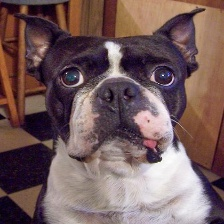

(1, 160, 160, 3)
1/1 [==============================] - 0s 24ms/step


KeyError: ignored

In [ ]:
import cv2
img=cv2.imread('/content/train/Bulldog/090.jpg')
cv2_imshow(img)
img=cv2.resize(img,(160,160))
img=img/255
img=img.reshape([1,160,160,3])
print(img.shape)
a[np.argmax(model.predict(img))]

In [ ]:
test_generator=ImageDataGenerator(
    rescale=1./255
)
test_generator=train_generator.flow_from_directory('/content/valid',target_size=(160,160),batch_size=32)

Found 700 images belonging to 70 classes.


In [ ]:
pred=model2.predict(test_generator)

22/22 [==============================] - 6s 256ms/step


In [ ]:
pred

array([[1.69338534e-06, 9.67880187e-05, 7.01123327e-06, ...,
        9.55628464e-04, 3.21908465e-06, 2.29475717e-07],
       [1.62812448e-05, 6.45280397e-06, 8.59709620e-01, ...,
        8.31463353e-07, 6.88109430e-05, 4.10800931e-06],
       [7.72518906e-05, 4.24902450e-04, 3.41668019e-05, ...,
        4.72773863e-05, 2.28357458e-05, 1.30371754e-05],
       ...,
       [1.03322156e-04, 2.91417557e-04, 3.57386634e-05, ...,
        2.72599119e-03, 3.98154771e-05, 6.09639683e-04],
       [1.72738219e-05, 7.92421750e-04, 3.02053086e-05, ...,
        1.01500318e-05, 4.43837507e-06, 4.28192237e-07],
       [1.33276451e-03, 4.54859389e-03, 2.53433100e-05, ...,
        1.21423494e-04, 1.32942136e-04, 2.30084028e-04]], dtype=float32)